In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [83]:
dataset_url = r"https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [84]:
import pathlib

In [85]:
data_dir

'./datasets/flower_photos'

In [86]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [87]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [88]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4495885281_fe2a3b671d.jpg'),
 PosixPath('datasets/flower_photos/roses/2888138918_402096c7fb.jpg'),
 PosixPath('datasets/flower_photos/roses/16157873719_bf0bdf8558_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12450781274_eb78723921.jpg'),
 PosixPath('datasets/flower_photos/roses/6036837996_7fbdcdb3c5_n.jpg')]

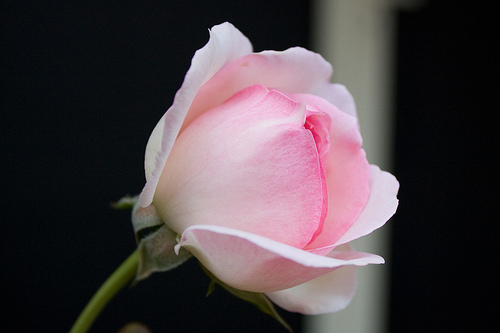

In [89]:
PIL.Image.open(str(roses[0]))

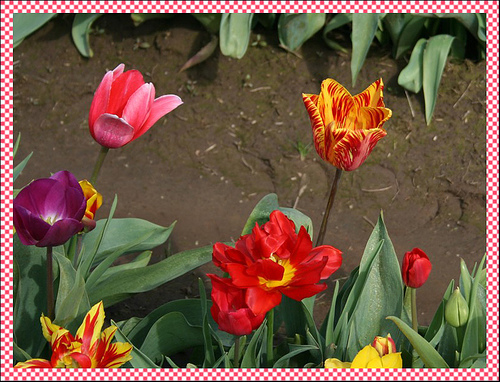

In [90]:
tulip = list(data_dir.glob('tulips/*.jpg'))
PIL.Image.open(str(tulip[0]))

In [91]:
flower_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'tulips': list(data_dir.glob('tulips/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'daisy': list(data_dir.glob('daisy/*'))
}

In [92]:
flowers_label_dict = {
    'roses':0,
    'tulips':1,
    'dandelion':2,
    'sunflowers':3,
    'daisy':4
}

In [93]:
import cv2
img = cv2.imread(str(flower_images_dict['roses'][0]))
img

array([[[15, 10,  9],
        [17, 12, 11],
        [14, 11,  7],
        ...,
        [ 1,  1,  1],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[10,  5,  4],
        [12,  7,  6],
        [11,  8,  4],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[15, 10,  7],
        [13, 10,  6],
        [14, 10,  9],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       ...,

       [[ 4,  2,  1],
        [ 3,  1,  0],
        [ 2,  0,  0],
        ...,
        [ 3,  1,  1],
        [ 3,  1,  1],
        [ 3,  1,  1]],

       [[ 4,  2,  1],
        [ 3,  1,  0],
        [ 3,  1,  0],
        ...,
        [ 4,  2,  2],
        [ 4,  2,  2],
        [ 4,  2,  2]],

       [[ 5,  3,  2],
        [ 4,  2,  1],
        [ 4,  2,  1],
        ...,
        [ 3,  1,  1],
        [ 4,  2,  2],
        [ 4,  2,  2]]], dtype=uint8)

In [94]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [95]:
X, y = [], []

for flower_name, images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_image = cv2.resize(img, (64,64))
        X.append(resized_image)
        y.append(flowers_label_dict[flower_name])
        

In [96]:
X = np.array(X)
y = np.array(y)

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [98]:
X_train = X_train/255
X_test = X_test/255

In [99]:
data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomContrast(0.9),
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [100]:
num_classes = 5
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=2)

Epoch 1/100
1376/1376 [==============================] - 8s 5ms/step - loss: 1.4068 - accuracy: 0.3648
Epoch 2/100
1376/1376 [==============================] - 6s 5ms/step - loss: 1.2216 - accuracy: 0.4898
Epoch 3/100
1376/1376 [==============================] - 6s 5ms/step - loss: 1.1673 - accuracy: 0.5236
Epoch 4/100
1376/1376 [==============================] - 6s 5ms/step - loss: 1.0939 - accuracy: 0.5650
Epoch 5/100
1376/1376 [==============================] - 6s 5ms/step - loss: 1.0645 - accuracy: 0.5665
Epoch 6/100
1376/1376 [==============================] - 6s 5ms/step - loss: 1.0416 - accuracy: 0.5923
Epoch 7/100
1376/1376 [==============================] - 6s 5ms/step - loss: 0.9964 - accuracy: 0.6090
Epoch 8/100
1376/1376 [==============================] - 6s 5ms/step - loss: 0.9744 - accuracy: 0.6137
Epoch 9/100
1376/1376 [==============================] - 8s 6ms/step - loss: 0.9808 - accuracy: 0.6101
Epoch 10/100
1376/1376 [==============================] - 8s 6ms/step - l

In [101]:
model.evaluate(X_test, y_test)

29/29 [==============================] - 0s 3ms/step - loss: 0.8571 - accuracy: 0.6678


[0.8571219444274902, 0.6677560210227966]